In [2]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
# Baca Dataset
data = pd.read_csv('BTCdataset.csv', parse_dates=['Date'], index_col='Date')

In [4]:
# Menampilkan 5 data teratas
data.head()

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2021-01-01 00:00:00,BTC,28979.74,29108.58,28765.00,29078.48,46.995661
2021-01-01 01:00:00,BTC,29078.48,29524.00,29028.91,29468.55,181.101579
2021-01-01 02:00:00,BTC,29468.55,29524.00,29161.83,29252.99,47.632786
2021-01-01 03:00:00,BTC,29252.99,29398.53,29237.94,29363.61,26.296977
2021-01-01 04:00:00,BTC,29363.61,29449.31,29138.55,29280.00,26.937673


In [5]:
# Menampilkan 5 data terbawah
data.tail()

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2021-10-05 20:00:00,BTC,55715.91,55715.91,53434.31,55321.30,570.426895
2021-10-05 21:00:00,BTC,55321.30,55888.70,55126.58,55800.04,62.493009
2021-10-05 22:00:00,BTC,55800.04,56318.04,55500.00,56290.72,60.883336
2021-10-05 23:00:00,BTC,56290.72,56318.96,55560.00,55882.44,61.036156
2021-11-05 00:00:00,BTC,55882.44,56020.64,55820.13,55861.40,7.048941


In [42]:
data.drop(['Symbol', 'Volume'], axis=1, inplace=True)

In [43]:
data.isnull()

,Open,High,Low,Close
Date,,,,
2021-01-01 00:00:00,False,False,False,False
2021-01-01 01:00:00,False,False,False,False
2021-01-01 02:00:00,False,False,False,False
2021-01-01 03:00:00,False,False,False,False
2021-01-01 04:00:00,False,False,False,False
...,...,...,...,...
2021-10-05 20:00:00,False,False,False,False
2021-10-05 21:00:00,False,False,False,False
2021-10-05 22:00:00,False,False,False,False


In [44]:
# Melihat jumlah data dan kolom
data.shape

(3121, 4)

In [47]:
data.tail()

,Open,High,Low,Close
Date,,,,
2021-10-05 20:00:00,55715.91,55715.91,53434.31,55321.30
2021-10-05 21:00:00,55321.30,55888.70,55126.58,55800.04
2021-10-05 22:00:00,55800.04,56318.04,55500.00,56290.72
2021-10-05 23:00:00,56290.72,56318.96,55560.00,55882.44
2021-11-05 00:00:00,55882.44,56020.64,55820.13,55861.40


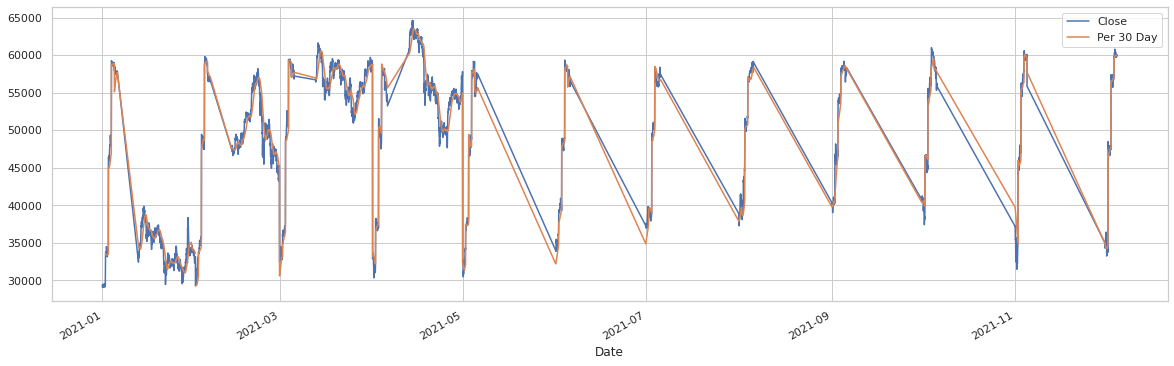

In [46]:
sns.set()
sns.set_style('whitegrid')
data['Close'].plot(figsize=(20,6),label='Close')
data['Close'].rolling(window=30).mean().plot(label='Per 30 Day')
plt.legend()

In [48]:
# Mencari rata-rata OHLC (Open, High, Low, Close)
data['OHLCAverage'] = (data['Open']+data['High']+data['Low']+data['Close'])/4

In [49]:
data.head()

,Open,High,Low,Close,OHLCAverage
Date,,,,,
2021-01-01 00:00:00,28979.74,29108.58,28765.00,29078.48,28982.9500
2021-01-01 01:00:00,29078.48,29524.00,29028.91,29468.55,29274.9850
2021-01-01 02:00:00,29468.55,29524.00,29161.83,29252.99,29351.8425
2021-01-01 03:00:00,29252.99,29398.53,29237.94,29363.61,29313.2675
2021-01-01 04:00:00,29363.61,29449.31,29138.55,29280.00,29307.8675


In [50]:
# Buat label
data['Prediction_Price'] = data['Close'].shift(-30)

In [51]:
data.tail()

,Open,High,Low,Close,OHLCAverage,Prediction_Price
Date,,,,,,
2021-10-05 20:00:00,55715.91,55715.91,53434.31,55321.30,55046.8575,NaN
2021-10-05 21:00:00,55321.30,55888.70,55126.58,55800.04,55534.1550,NaN
2021-10-05 22:00:00,55800.04,56318.04,55500.00,56290.72,55977.2000,NaN
2021-10-05 23:00:00,56290.72,56318.96,55560.00,55882.44,56013.0300,NaN
2021-11-05 00:00:00,55882.44,56020.64,55820.13,55861.40,55896.1525,NaN


In [53]:
# Prepocessing
from sklearn import preprocessing
data.dropna(inplace=True)
x = data.drop('Prediction_Price', axis=1)
# scaling model
x = preprocessing.scale(x) 
y = data['Prediction_Price']

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [61]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=200, random_state=101)
reg.fit(x_train, y_train)
akurasi = reg.score(x_test, y_test)
akurasi = akurasi*100
akurasi = float("{0:.4f}".format(akurasi))
print('Akurasi =', akurasi,'%')

Akurasi = 94.0974 %


In [62]:
prediksi = reg.predict(x_test)
print("Prediksi =", prediksi[1], "| Nilai asli =", y_test[1])

Prediksi = 60995.7367 | Nilai asli = 60668.2


In [64]:
# Menerapkan model pada prediksi
#ambil 30 elemen untuk membuat prediksi
x_predict = x[-30:]
forecast = reg.predict(x_predict)

In [66]:
from datetime import datetime, timedelta
last_date = data.iloc[-1].name
updated = last_date + timedelta(days=1)
date = pd.date_range(updated, periods=30, freq='D')
date1 = pd.DataFrame(forecast, columns=['Forecast'], index=date)
data = data.append(date1)
data.tail()

,Open,High,Low,Close,OHLCAverage,Prediction_Price,Forecast
2021-10-01 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,55490.94870
2021-10-02 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,56204.17275
2021-10-03 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,56707.04865
2021-10-04 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,56666.80370
2021-10-05 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,56409.96500


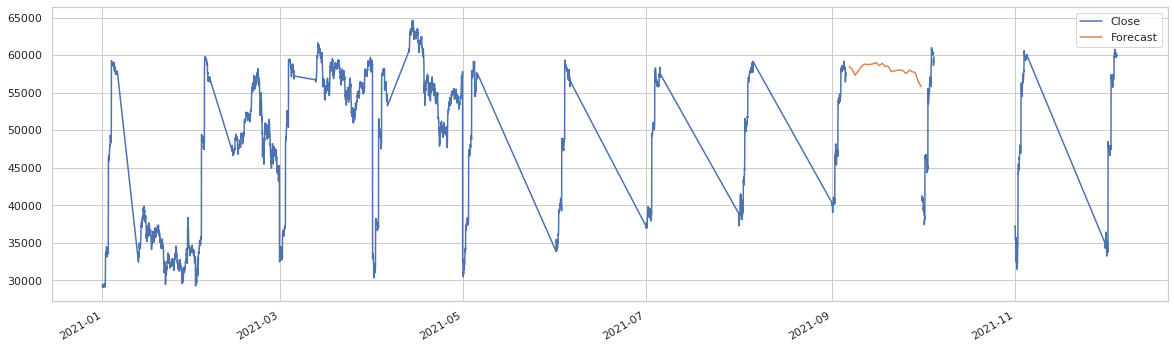

In [67]:
data['Close'].plot(figsize=(20,6), label='Close')
data['Forecast'].plot(label='Forecast')
plt.legend()

Harga Bitcoin Diperkirakan turun pada tanggal 10 Oktober 2021